In [1]:
!pip install seaborn --upgrade

    100% |████████████████████████████████| 215kB 24.0MB/s 
  Found existing installation: seaborn 0.7.1
    Uninstalling seaborn-0.7.1:
      Successfully uninstalled seaborn-0.7.1


# Lecture 9: Calculations with probability distributions

Here we'll look at simple computations with probability distributions and show an example of the [law of large numbers](https://en.wikipedia.org/wiki/Law_of_large_numbers).

Let's start with a random variable $X$. We'll assume that $X$ can only take on some discrete set of values, $X \in \left[v_1, v_2, \ldots, v_n\right]$. The probability that $X$ has any value $v_i$ is given by $P(v_i)$. $P$ is called the probability distribution, and it must be normalized so that

$$\sum_{i=1}^{n} P(v_i) = 1\,.$$

Sometimes, when the meaning is clear, we'll simply write the sum over all possible values $i$ as $\sum_i$, without specifying the starting and ending indices. 

If we want to find the average of some function of the random variable $f(X)$, we do it by averaging $f(X)$ over the probability distribution,

$$\left\langle f(X)\right\rangle = \sum_i P(v_i)\, f(v_i)\,.$$

The angular brackets $\left\langle \cdot\right\rangle$ denote an average. Sometimes statisticians use the notation $E[\cdot]$ to mean the same thing.

### Example: a 6-sided die (D6)

A simple example of a random number is the number that appears from a D6 roll. Let's define such an object in Python.

In [0]:
import numpy as np
import numpy.random as rng
import seaborn as sns
import matplotlib.pyplot as plt

# Now, let's define the D6 -- what values can it take?
d6_values = np.array([1, 2, 3, 4, 5, 6])

# ...and what is the probability of getting each of them?
d6_probs = np.array([1/6, 1/6, 1/6, 1/6, 1/6, 1/6])

What is the expected (average) value that we would get when we roll the D6? Let's write a function to calculate it. Let's also check the variance.

In [4]:
def get_avg(f):
    """ Returns the average of a function f over rolls of a 6-sided die"""
    return np.sum( f(d6_values) * d6_probs )
  
def f(X):
  return X

get_avg(f)

3.5

In [3]:
help(np.sum)

Help on function sum in module numpy.core.fromnumeric:

sum(a, axis=None, dtype=None, out=None, keepdims=<class 'numpy._globals._NoValue'>)
    Sum of array elements over a given axis.
    
    Parameters
    ----------
    a : array_like
        Elements to sum.
    axis : None or int or tuple of ints, optional
        Axis or axes along which a sum is performed.  The default,
        axis=None, will sum all of the elements of the input array.  If
        axis is negative it counts from the last to the first axis.
    
        .. versionadded:: 1.7.0
    
        If axis is a tuple of ints, a sum is performed on all of the axes
        specified in the tuple instead of a single axis or all the axes as
        before.
    dtype : dtype, optional
        The type of the returned array and of the accumulator in which the
        elements are summed.  The dtype of `a` is used by default unless `a`
        has an integer dtype of less precision than the default platform
        integer.  I

### Exploring finite sampling

What do we expect to get if we roll the D6 a finite number of times? The average of our rolls will be distributed around the true average, but with some *noise*. As we saw earlier, the magnitude of the noise should scale like $1/\sqrt{N}$, where $N$ is the number of samples (rolls). Let's check this numerically. First, we'll write a function that rolls the die, then we'll use that to generate random rolls and plot the results.

In [0]:
# Let's write a function to roll the die

def roll_d6(n_times=1):
    """Return n_times rolls of a 6-sided die"""
    return np.random.choice(d6_values, size=n_times, p=d6_probs)

In [0]:
help(np.random.choice)

In [7]:
# The expected values

def func(X):
    return X
d6_mean = get_avg(func)

def func(X):
    return X**2
d6_var = get_avg(func) - d6_mean**2


# Let's roll the D6 1000 times

roll_1000 = roll_d6(1000)

print('True mean: %.4f, sample mean: %.4f' % (d6_mean, np.mean(roll_1000)))
print('True variance: %.4f, sample variance: %.4f' % (d6_var, np.var(roll_1000)))

True mean: 3.5000, sample mean: 3.5450
True variance: 2.9167, sample variance: 2.9460


**Exercise:** Let's make a plot to observe convergence to the mean. Test different values for the number of rolls. What happens as the number of rolls increases? 

Based on our prior calculations, I claim that the average value over $N$ rolls will be centered around the true average, with a standard deviation that is equal to the standard deviation of a single roll, divided by $\sqrt{N}$. Does this describe your results?

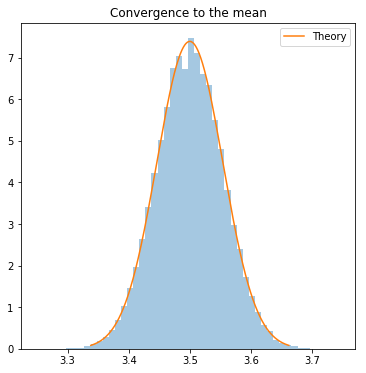

In [12]:
# First, define the Gaussian distribution

def gaussian(x, mu, sigma):
    return np.exp( -(x-mu)**2 /( 2 * (sigma**2) ) ) / np.sqrt(2 * np.pi * (sigma**2))


# Now, roll the die many times and get the average over each set of rolls

n_rolls   = 1000
n_repeats = 100000

avgs = []
for i in range(n_repeats):
    avgs.append(np.mean(roll_d6(n_rolls)))

    
# Plot the histogram of the role values, together with expectations
 
mu    = d6_mean
sigma = np.sqrt(d6_var / n_rolls)
dx    = 6*sigma/1000
x_vals = np.arange(mu - 3*sigma, mu + 3*sigma + dx, dx)
y_vals = gaussian(x_vals, mu, sigma)

dims = 6
fig, ax = plt.subplots(figsize=(dims, dims))
sns.distplot(avgs, ax=ax, kde=False, norm_hist=True)
sns.lineplot(x_vals, y_vals, label='Theory')
plt.title("Convergence to the mean");